In [1]:
# https://ppiazi.tistory.com/entry/python-cyclomatic-complexity-%EB%AA%A8%EB%93%88-lizard

In [2]:
# https://github.com/terryyin/lizard

In [3]:
# pip install cognitive_complexity

In [4]:
# pip install statsmodels

In [5]:
# pip install --upgrade pandas==2.2.0

In [6]:
# import numpy as np
# np.__version__

In [7]:
# pip install --upgrade numexpr==2.8.4

In [8]:
# pip install linearmodels

In [9]:
#customized preprocessing pkg
import preprocess as pp
import pandas as pd
import numpy as np
import pickle
import ast
from cognitive_complexity.api import get_cognitive_complexity
import pprint
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.formula.api as sm
import datetime
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 소스코드 complexity 계산

In [10]:
input_year_list = ['2021', '2022', '2023']

In [11]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'../../data/complexity_python_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [12]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2021-01-01
2023-12-03


In [13]:
# 전체 데이터셋 
with open('../../data/complexity_src_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [14]:
src_df.head()

,idx,id,src
0,995,77296103,from copy import deepcopy\nfrom typing import ...
1,996,77296116,"preprocessing = ColumnTransformer([(""One Hot E..."
2,997,77296116,"SVC_model = Pipeline([(""preprocessing"", prepro..."
3,998,77296116,"svc_params = {\n'kernel': [""linear"", ""poly"", ""..."
4,999,77296116,# Access the cross-validation results from the...


In [15]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'../../data/calc_com_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

### complexity 결과 확인

In [16]:
# 503571
calc_com_df.groupby(['Path']).count()

,File Name,Cognitive Complexity
Path,,
0_70702244.py,1,1
0_74935859.py,1,1
100000_69208993.py,1,1
100000_73587727.py,1,1
100001_73587745.py,1,1
...,...,...
999_77296116.py,1,1
99_74930265.py,1,1
9_70397958.py,1,1


In [17]:
complexity_python_df[complexity_python_df['id'] ==70702244]

,id,cdate,title,body
1,70702244,2021-12-28,Best way to manage y/n and password prompts th...,<p>I am creating a Python script to install AU...


In [18]:
src_df[src_df['id'] ==70702244]

,idx,id,src
11055,0,70702244,cmd = r'yes y | makepkg -si'\noutput = subproc...


In [19]:
calc_com_df.reset_index(drop=True, inplace=True)

In [20]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,353900_65948963.py,353900_65948963.py,3
1,377254_65638981.py,377254_65638981.py,0
2,94558_69251293.py,94558_69251293.py,0
3,223504_67683129.py,223504_67683129.py,0
4,111551_69022973.py,111551_69022973.py,0


In [21]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [22]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [23]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
164589,0_70702244.py,0_70702244.py,0,0,70702244
363420,0_74935859.py,0_74935859.py,1,0,74935859
67043,1_70397890.py,1_70397890.py,0,1,70397890
230047,1_74574281.py,1_74574281.py,6,1,74574281
427921,1_77569752.py,1_77569752.py,0,1,77569752
...,...,...,...,...,...
274042,99997_73587690.py,99997_73587690.py,6,99997,73587690
407696,99997_76005895.py,99997_76005895.py,0,99997,76005895
155471,99999_69208993.py,99999_69208993.py,0,99999,69208993
335421,99999_73587727.py,99999_73587727.py,1,99999,73587727


In [24]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [25]:
src_df[['idx', 'id']] = src_df[['idx', 'id']].astype('int')

In [26]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482331 entries, 0 to 482330
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  482331 non-null  object
 1   File Name             482331 non-null  object
 2   Cognitive Complexity  482331 non-null  int64 
 3   idx                   482331 non-null  int64 
 4   id                    482331 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.4+ MB


In [27]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939219 entries, 0 to 939218
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   idx     939219 non-null  int64 
 1   id      939219 non-null  int64 
 2   src     939219 non-null  object
dtypes: int64(2), object(1)
memory usage: 21.5+ MB


In [28]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['idx', 'id'])

In [29]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [30]:
calc_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0


### understandable하지 않은 것 

In [31]:
calc_com_df['cdate'].min()

'2021-01-01'

In [32]:
calc_com_df['cdate'].max()

'2023-12-03'

In [33]:
calc_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0
...,...,...,...,...,...,...,...
939214,77473871,2023-11-13,189337,export emp_code='IT'\nexport _emp_url= '\n'IT'...,NaN,NaN,NaN
939215,77473871,2023-11-13,189338,import os\nfrom os import listdir\nfrom os.pat...,NaN,NaN,NaN
939216,77473875,2023-11-13,189339,"_version_mismatch_error(metadata_dict[""kedro_i...",NaN,NaN,NaN
939217,77473880,2023-11-13,189340,"def sample_run_report(credentials=None, proper...",NaN,NaN,NaN


In [34]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [35]:
calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [36]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0
...,...,...,...,...,...,...,...
751579,77593648,2023-12-03,191636,\nimport os\nimport polars as pl\n\ndef split_...,191636_77593648.py,191636_77593648.py,2.0
751585,77593680,2023-12-03,191589,import numpy as np\nimport pandas as pd\nimpor...,191589_77593680.py,191589_77593680.py,0.0
751591,77593717,2023-12-03,191590,import hashlib\n\nuser_hash_dict = {}\n\nwith ...,191590_77593717.py,191590_77593717.py,6.0
745960,77593807,2023-12-03,193259,# -*- coding: cp1251 -*- #перекодирование файл...,193259_77593807.py,193259_77593807.py,6.0


In [37]:
calc_ed_cnt = calc_ed_com_df.groupby(['cdate']).count()[['id']].reset_index()

In [38]:
not_calc_ed_cnt = calc_com_df[calc_com_df['Path'].isna()].groupby(['cdate']).count()[['id']].reset_index()

In [39]:
calc_ed_cnt.head()

,cdate,id
0,2021-01-01,229
1,2021-01-02,302
2,2021-01-03,318
3,2021-01-04,391
4,2021-01-05,421


In [40]:
not_calc_ed_cnt

,cdate,id
0,2021-01-01,357
1,2021-01-02,410
2,2021-01-03,431
3,2021-01-04,599
4,2021-01-05,597
...,...,...
1062,2023-11-29,296
1063,2023-11-30,288
1064,2023-12-01,226
1065,2023-12-02,146


In [41]:
calc_ed_cnt['yyyymm'] = calc_ed_cnt['cdate'].str[:7]

In [42]:
major_xticks = calc_ed_cnt.groupby(['yyyymm']).max()['cdate'].to_list()
major_xticks = major_xticks[:-1]

In [43]:
calc_ed_cnt.columns = ['cdate', 'calced_cnt', 'yyyymm']
not_calc_ed_cnt.columns = ['cdate', 'notcalced_cnt']

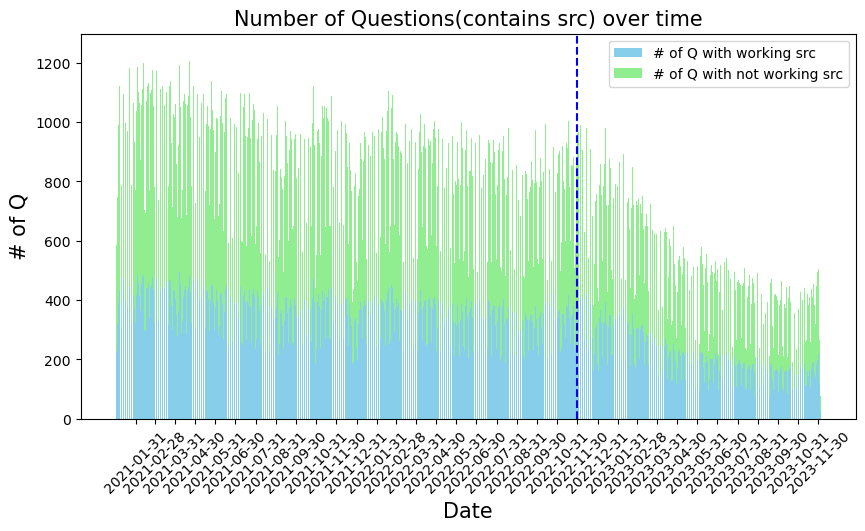

In [44]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(calc_ed_cnt['cdate'], calc_ed_cnt['calced_cnt'], color='skyblue', label = '# of Q with working src')
ax.bar(not_calc_ed_cnt['cdate'], not_calc_ed_cnt['notcalced_cnt'], bottom = calc_ed_cnt['calced_cnt'], color = 'lightgreen', label = '# of Q with not working src')

ax.set_title('Number of Questions(contains src) over time', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('# of Q', fontsize = 15)
ax.set_xticks(major_xticks)

ax.axvline(major_xticks[22], # add vertical line
       color = 'blue',
       linestyle = '--',
       linewidth = 1.5)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc = 'upper right', fontsize = 10) # add legend

plt.show();

In [45]:
calc_ed_cnt

,cdate,calced_cnt,yyyymm
0,2021-01-01,229,2021-01
1,2021-01-02,302,2021-01
2,2021-01-03,318,2021-01
3,2021-01-04,391,2021-01
4,2021-01-05,421,2021-01
...,...,...,...
1062,2023-11-29,199,2023-11
1063,2023-11-30,218,2023-11
1064,2023-12-01,154,2023-12
1065,2023-12-02,121,2023-12


In [46]:
syn_tree_calc = pd.merge(calc_ed_cnt, not_calc_ed_cnt, on = 'cdate')

In [47]:
syn_tree_calc['calced_rate'] = (syn_tree_calc['calced_cnt']/(syn_tree_calc['calced_cnt'] + syn_tree_calc['notcalced_cnt'] ))*100

In [48]:
syn_tree_calc['notcalced_rate'] = 100 - syn_tree_calc['calced_rate']  

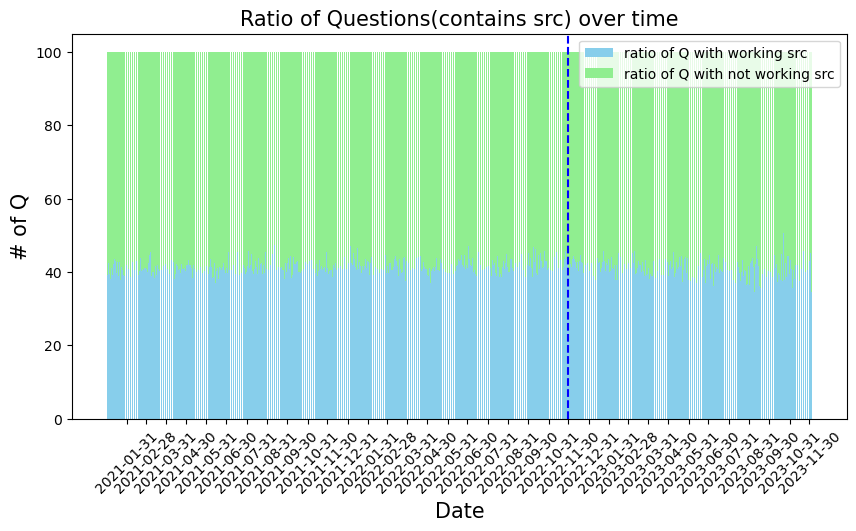

In [49]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(syn_tree_calc['cdate'], syn_tree_calc['calced_rate'], color='skyblue', label = 'ratio of Q with working src')
ax.bar(syn_tree_calc['cdate'], syn_tree_calc['notcalced_rate'], bottom = syn_tree_calc['calced_rate'], color = 'lightgreen', label = 'ratio of Q with not working src')

ax.set_title('Ratio of Questions(contains src) over time', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('# of Q', fontsize = 15)
ax.set_xticks(major_xticks)

ax.axvline(major_xticks[22], # add vertical line
       color = 'blue',
       linestyle = '--',
       linewidth = 1.5)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc = 'upper right', fontsize = 10) # add legend

plt.show();

In [50]:
calc_ed_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0


In [51]:
calc_ed_com_box_df = calc_ed_com_df.copy()

In [52]:
calc_ed_com_box_df['yyyymm'] = calc_ed_com_box_df['cdate'].str[:7]

In [53]:
ym_list = calc_ed_com_box_df['yyyymm'].unique()

In [54]:
ym_list

array(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype=object)

In [55]:
# sharey = True ## 또는 sharey=False
# sharex = True ## 또는 sharex=False

# fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# # plt.xticks(rotation=45)
# # major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
# #                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# # yticks = np.arange(200, 2000, 400)
# axs[0].bar(calc_ed_com_df['cdate']
#         ,  calc_ed_com_df['Cognitive Complexity']
#         ,  color = 'skyblue'
#         # ,  edgecolor = 'black'
#       ) # hist type

# axs[0].set_title('Number of Questions over time', fontsize = 15)
# axs[0].set_xlabel('Date', fontsize = 15)
# axs[0].set_ylabel('# of Q', fontsize = 15)
# # axs[0].set_xticks(major_xticks)
# # axs[0].set_yticks(yticks)
# # axs[0].axvline([major_xticks[-2]], # add vertical line
# #            color = 'blue',
# #            linestyle = '--',
# #            linewidth = 1.5)
# axs[0].tick_params(axis='x', rotation=45)
# # axs[0].yticks(yt)

# axs[0].bar(calc_ed_com_df['cdate']
#         ,  calc_ed_com_df['Cognitive Complexity']
#         ,  color = 'skyblue'
#         # ,  edgecolor = 'black'
#       ) # hist type

# axs[1].set_title('Number of Answers over time', fontsize = 15)
# axs[1].set_xlabel('Date', fontsize = 15)
# axs[1].set_ylabel('# of A', fontsize = 15)
# # axs[1].set_xticks(major_xticks)
# # axs[1].set_yticks(yticks)
# # axs[1].axvline([major_xticks[-2]], # add vertical line
# #            color = 'blue',
# #            linestyle = '--',
# #            linewidth = 1.5)
# axs[1].tick_params(axis='x', rotation=45)

# plt.show();


In [56]:
calc_ed_com_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321292 entries, 395794 to 745961
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    321292 non-null  int64  
 1   cdate                 321292 non-null  object 
 2   idx                   321292 non-null  int64  
 3   src                   321292 non-null  object 
 4   Path                  321292 non-null  object 
 5   File Name             321292 non-null  object 
 6   Cognitive Complexity  321292 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 19.6+ MB


In [57]:
calc_ed_com_df['yyyymm'] = calc_ed_com_df['cdate'].str[:7]

In [58]:
ym_list = calc_ed_com_df.groupby(['yyyymm']).max()['cdate'].values[:-1]

In [59]:
ym_list

array(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
       '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
       '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
       '2023-09-30', '2023-10-31', '2023-11-30'], dtype=object)

In [60]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['cdate']).mean(numeric_only=True).reset_index()
# ['Cognitive Complexity']

In [61]:
calc_ed_com_median_df = calc_ed_com_df.groupby(['cdate']).median(numeric_only=True).reset_index()

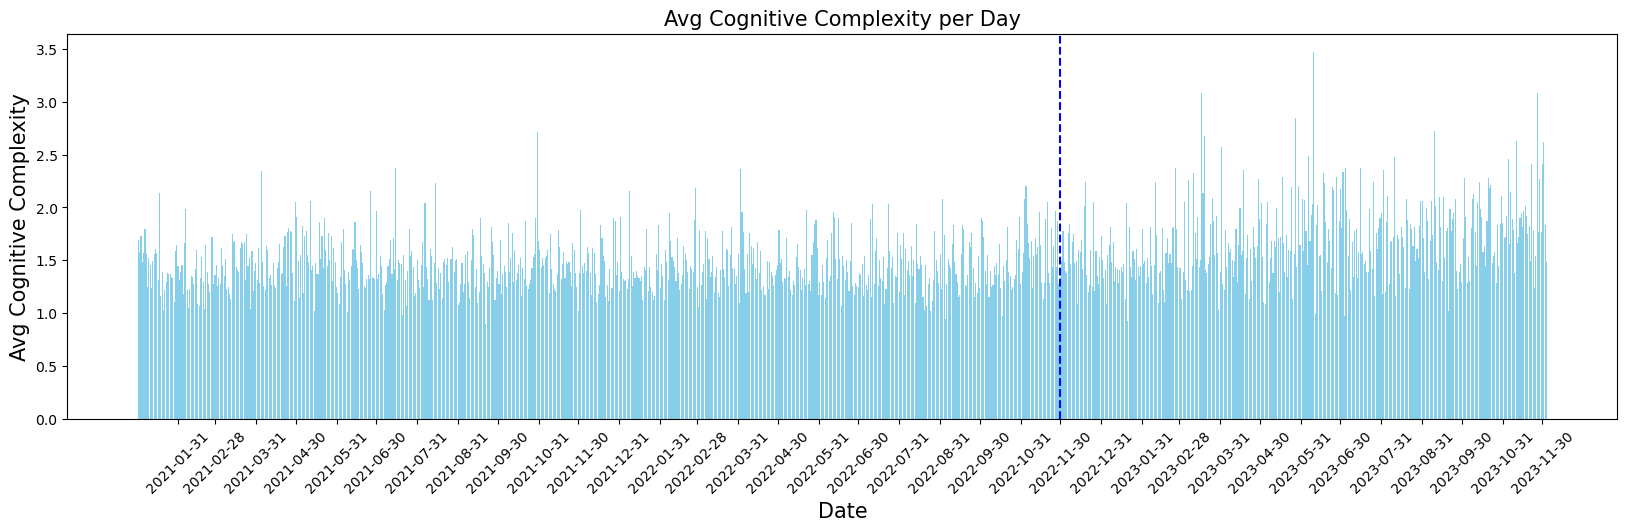

In [62]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(figsize = (20, 5), sharey=False, sharex=False)
# plt.xticks(rotation=45)


axs1_xticks = ym_list
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
# yticks = np.arange(200, 2000, 400)
axs.bar(calc_ed_com_mean_df['cdate']
        ,  calc_ed_com_mean_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs.set_title('Avg Cognitive Complexity per Day', fontsize = 15)
axs.set_xlabel('Date', fontsize = 15)
axs.set_ylabel('Avg Cognitive Complexity', fontsize = 15)
axs.set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
axs.axvline(axs1_xticks[23], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs.tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)


plt.show();


In [63]:
ym_list[:11]
# ym_list[12:]

array(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
       '2021-09-30', '2021-10-31', '2021-11-30'], dtype=object)

,id,cdate,idx,src,Path,File Name,Cognitive Complexity,yyyymm
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0,2021-01
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0,2021-01
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0,2021-01
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0,2021-01
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0,2021-01
...,...,...,...,...,...,...,...,...
751579,77593648,2023-12-03,191636,\nimport os\nimport polars as pl\n\ndef split_...,191636_77593648.py,191636_77593648.py,2.0,2023-12
751585,77593680,2023-12-03,191589,import numpy as np\nimport pandas as pd\nimpor...,191589_77593680.py,191589_77593680.py,0.0,2023-12
751591,77593717,2023-12-03,191590,import hashlib\n\nuser_hash_dict = {}\n\nwith ...,191590_77593717.py,191590_77593717.py,6.0,2023-12
745960,77593807,2023-12-03,193259,# -*- coding: cp1251 -*- #перекодирование файл...,193259_77593807.py,193259_77593807.py,6.0,2023-12


In [167]:
calc_ed_com_box_df = calc_ed_com_mean_df.copy()

In [169]:
calc_ed_com_box_df

,cdate,id,idx,Cognitive Complexity
0,2021-01-01,6.553101e+07,394448.410480,1.689956
1,2021-01-02,6.554027e+07,393165.784768,1.582781
2,2021-01-03,6.555093e+07,391343.544025,1.729560
3,2021-01-04,6.556447e+07,389050.580563,1.485934
4,2021-01-05,6.558022e+07,387018.978622,1.570071
...,...,...,...,...
1062,2023-11-29,7.757138e+07,131455.291457,1.768844
1063,2023-11-30,7.757884e+07,192526.642202,2.412844
1064,2023-12-01,7.758570e+07,191990.188312,2.616883
1065,2023-12-02,7.759073e+07,191740.652893,1.834711


In [178]:
calc_ed_com_box_df['yyyymm'] = calc_ed_com_box_df['cdate'].apply(lambda x : str(x.year)+'-'+str(x.month))

In [179]:
calc_ed_com_box_df.head()

,cdate,id,idx,Cognitive Complexity,yyyymm
0,2021-01-01,6.553101e+07,394448.410480,1.689956,2021-1
1,2021-01-02,6.554027e+07,393165.784768,1.582781,2021-1
2,2021-01-03,6.555093e+07,391343.544025,1.729560,2021-1
3,2021-01-04,6.556447e+07,389050.580563,1.485934,2021-1
4,2021-01-05,6.558022e+07,387018.978622,1.570071,2021-1


In [180]:
ym_list = calc_ed_com_box_df['yyyymm'].unique()

In [181]:
[calc_ed_com_box_df[calc_ed_com_box_df['yyyymm']==x]  for x in ym_list]

[        cdate            id            idx  Cognitive Complexity  yyyymm
 0  2021-01-01  6.553101e+07  394448.410480              1.689956  2021-1
 1  2021-01-02  6.554027e+07  393165.784768              1.582781  2021-1
 2  2021-01-03  6.555093e+07  391343.544025              1.729560  2021-1
 3  2021-01-04  6.556447e+07  389050.580563              1.485934  2021-1
 4  2021-01-05  6.558022e+07  387018.978622              1.570071  2021-1
 5  2021-01-06  6.559657e+07  384469.386946              1.799534  2021-1
 6  2021-01-07  6.561353e+07  381646.135255              1.560976  2021-1
 7  2021-01-08  6.563008e+07  378641.435065              1.246753  2021-1
 8  2021-01-09  6.564333e+07  376406.191558              1.522727  2021-1
 9  2021-01-10  6.565439e+07  374843.337793              1.454849  2021-1
 10 2021-01-11  6.566767e+07  373144.334171              1.238693  2021-1
 11 2021-01-12  6.568548e+07  382444.882353              1.489496  2021-1
 12 2021-01-13  6.570280e+07  391869.8

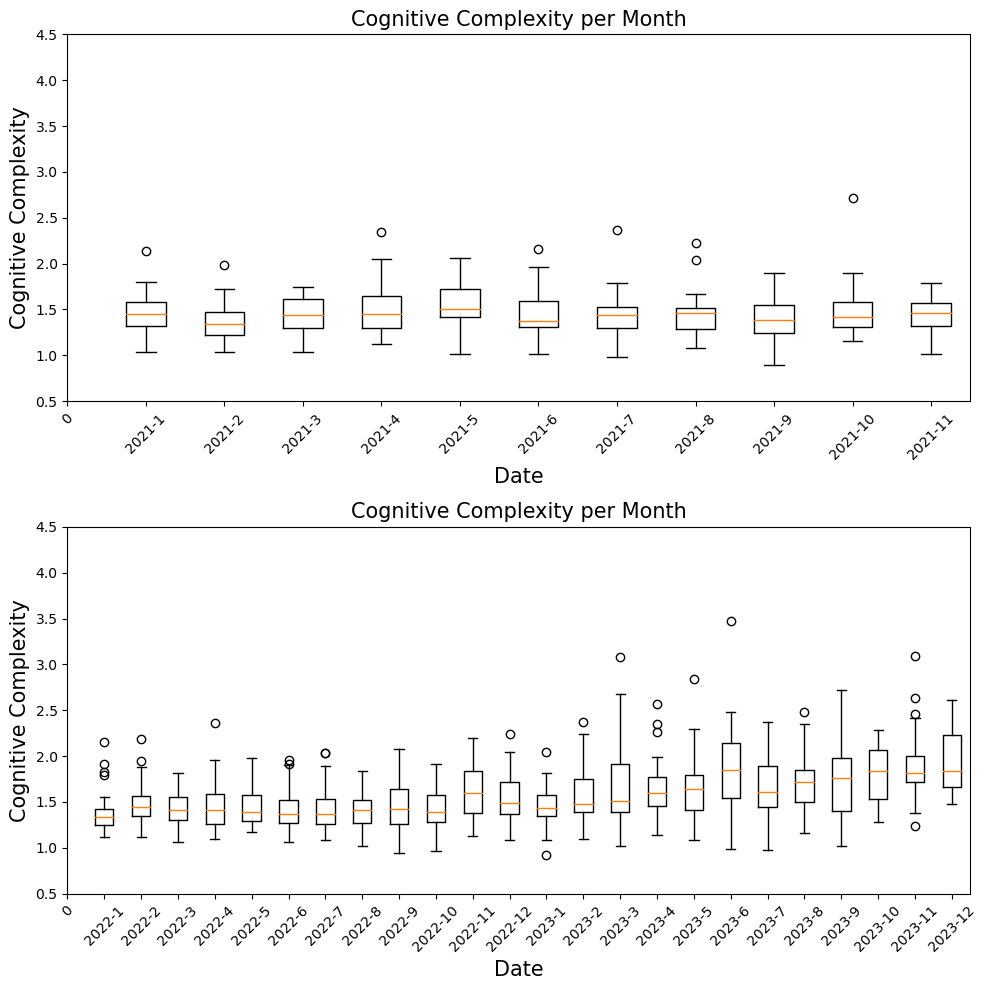

In [182]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[:11]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[12:]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
yticks = np.arange(0.5, 5, 0.5)

axs[0].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[:11]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)


axs[1].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[12:]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [186]:
ym_list[8:15]

array(['2021-9', '2021-10', '2021-11', '2021-12', '2022-1', '2022-2',
       '2022-3'], dtype=object)

In [187]:
ym_list[20:27]

array(['2022-9', '2022-10', '2022-11', '2022-12', '2023-1', '2023-2',
       '2023-3'], dtype=object)

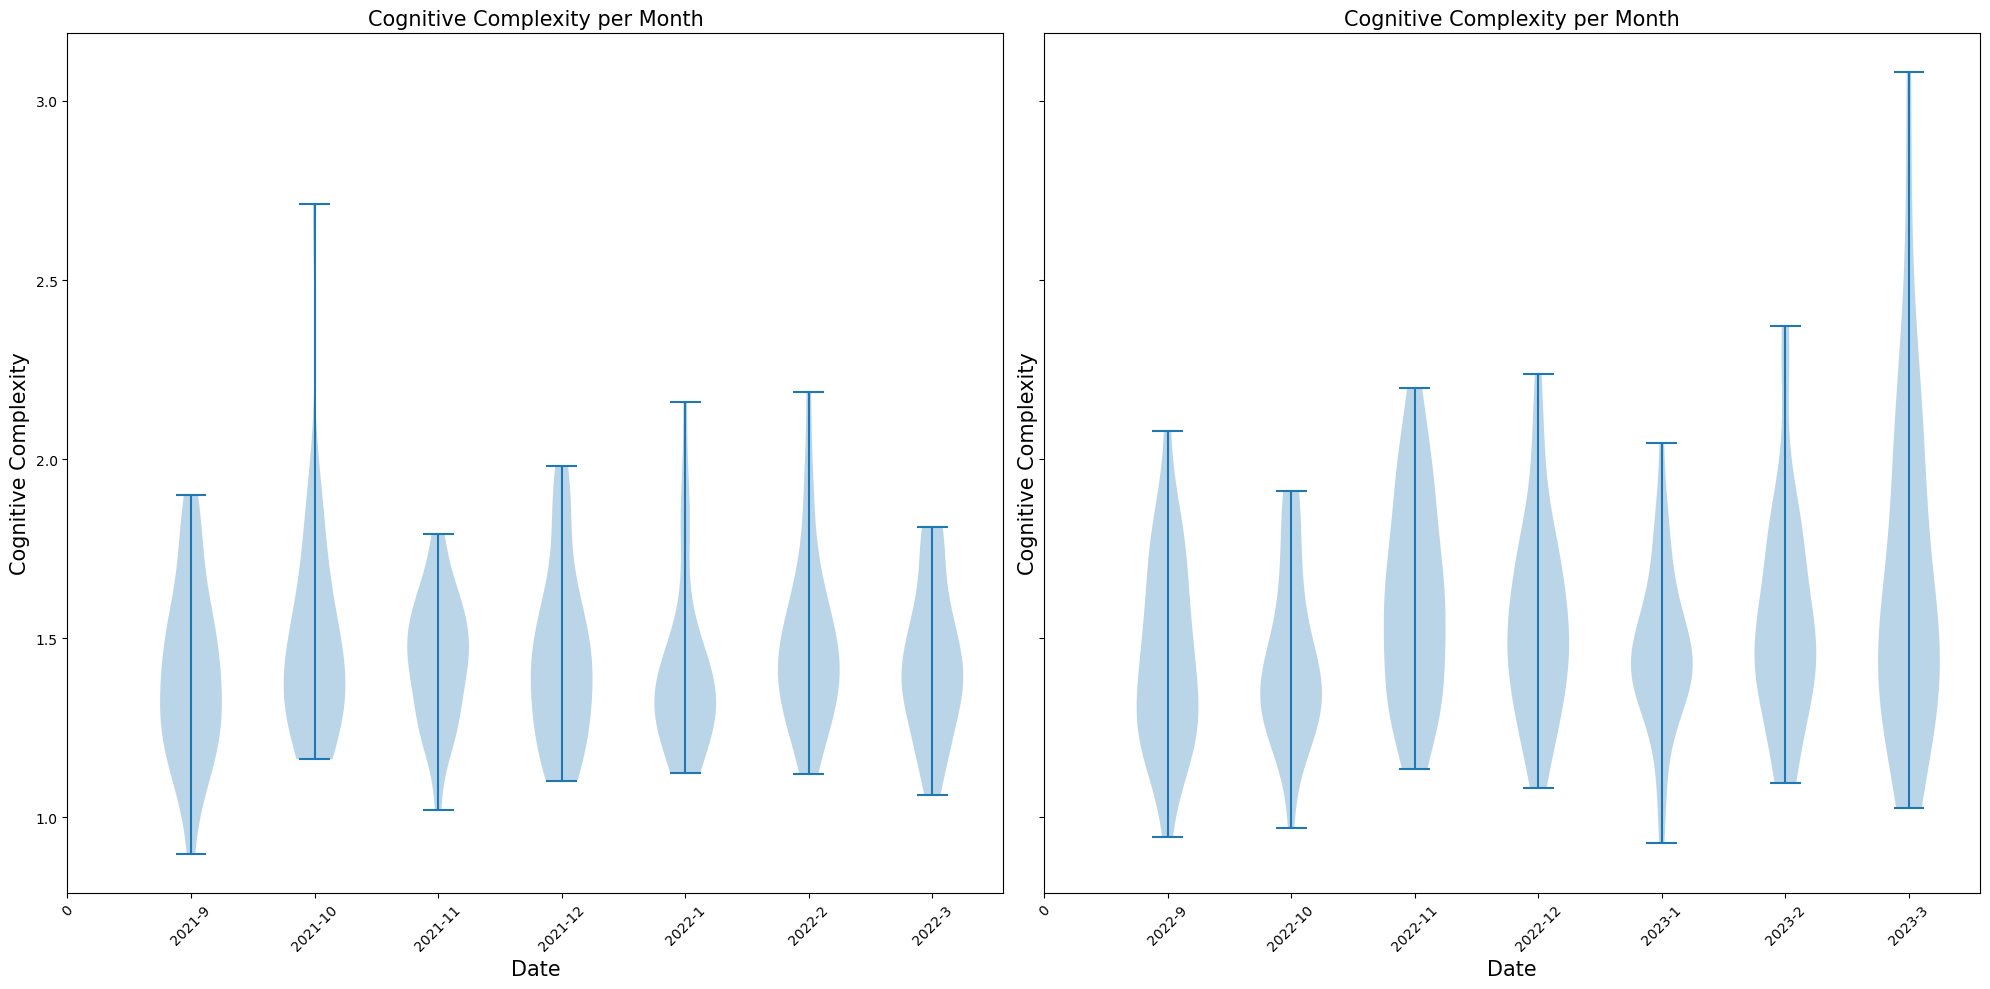

In [190]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[8:15]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[20:27]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
# yticks = np.arange(0.5, 5, 0.5)


axs[0].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[8:15]], positions=np.arange(1, 8, 1))
axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
# axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)



axs[1].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[20:27]], positions=np.arange(1, 8, 1))
axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [130]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity,yyyymm
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0,2021-01
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0,2021-01
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0,2021-01
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0,2021-01
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0,2021-01
...,...,...,...,...,...,...,...,...
751579,77593648,2023-12-03,191636,\nimport os\nimport polars as pl\n\ndef split_...,191636_77593648.py,191636_77593648.py,2.0,2023-12
751585,77593680,2023-12-03,191589,import numpy as np\nimport pandas as pd\nimpor...,191589_77593680.py,191589_77593680.py,0.0,2023-12
751591,77593717,2023-12-03,191590,import hashlib\n\nuser_hash_dict = {}\n\nwith ...,191590_77593717.py,191590_77593717.py,6.0,2023-12
745960,77593807,2023-12-03,193259,# -*- coding: cp1251 -*- #перекодирование файл...,193259_77593807.py,193259_77593807.py,6.0,2023-12


In [143]:
cond1 = calc_ed_com_mean_df['cdate']>='2021-10-06'
cond2 = calc_ed_com_mean_df['cdate']<='2022-03-15'
cond3 = calc_ed_com_mean_df['cdate']>='2022-10-05'
cond4 = calc_ed_com_mean_df['cdate']<='2023-03-14'

In [144]:
calc_ed_com_mean_df['cdate'] = pd.to_datetime(calc_ed_com_mean_df['cdate'])

In [145]:
bf = calc_ed_com_mean_df[(cond1&cond2)].copy()
af = calc_ed_com_mean_df[(cond3&cond4)].copy()

In [146]:
bf.loc[:,  'rel_days'] = bf.loc[:,  'cdate'] - datetime.datetime(2021,12,1 )
af.loc[:,  'rel_days'] = af.loc[:, 'cdate'] - datetime.datetime(2022,11,30)

In [147]:
bf.loc[:, 'treat'] = 0
af.loc[:, 'treat'] = 1

bf.loc[:, 'T_d'] = 0
af.loc[:, 'T_d'] = 1

In [148]:
bf['P_t'] = np.where(bf['cdate']>= '2021-11-30', 1, 0)
af['P_t'] = np.where(af['cdate']>= '2022-12-01', 1, 0)

In [149]:
bf[bf['cdate']>= '2021-11-29']

,cdate,id,idx,Cognitive Complexity,rel_days,treat,T_d,P_t
332,2021-11-29,7.015609e+07,184159.856098,1.243902,-2 days,0,0,0
333,2021-11-30,7.016999e+07,148011.108040,1.020101,-1 days,0,0,1
334,2021-12-01,7.018516e+07,105306.858852,1.382775,0 days,0,0,1
335,2021-12-02,7.020038e+07,72271.367188,1.979167,1 days,0,0,1
336,2021-12-03,7.021506e+07,47694.591260,1.444730,2 days,0,0,1
...,...,...,...,...,...,...,...,...
434,2022-03-11,7.144017e+07,270198.783784,1.387387,100 days,0,0,1
435,2022-03-12,7.144989e+07,268717.170306,1.537118,101 days,0,0,1
436,2022-03-13,7.145759e+07,267661.714894,1.200000,102 days,0,0,1
437,2022-03-14,7.146915e+07,265962.163978,1.344086,103 days,0,0,1


In [151]:
af[af['cdate']>= '2022-11-29']

,cdate,id,idx,Cognitive Complexity,rel_days,treat,T_d,P_t
697,2022-11-29,7.461486e+07,11434.164384,1.273973,-1 days,1,1,0
698,2022-11-30,7.462870e+07,8624.460106,1.337766,0 days,1,1,0
699,2022-12-01,7.464264e+07,16501.701657,1.488950,1 days,1,1,1
700,2022-12-02,7.465641e+07,24048.255263,1.778947,2 days,1,1,1
701,2022-12-03,7.466741e+07,22306.212418,1.483660,3 days,1,1,1
...,...,...,...,...,...,...,...,...
798,2023-03-10,7.569691e+07,128379.078767,1.445205,100 days,1,1,1
799,2023-03-11,7.570576e+07,126815.198895,2.325967,101 days,1,1,1
800,2023-03-12,7.571388e+07,125059.723757,1.762431,102 days,1,1,1
801,2023-03-13,7.572285e+07,124002.567568,1.513514,103 days,1,1,1


In [152]:
bf['rel_week'] = np.floor(bf['rel_days'].dt.days/7)
af['rel_week'] = np.floor(af['rel_days'].dt.days/7)

In [153]:
bf[['treat', 'rel_week']] = bf[['treat', 'rel_week']].astype(int)
af[['treat', 'rel_week']] = af[['treat', 'rel_week']].astype(int)

In [154]:
bf['rel_week'] = pd.Categorical(bf['rel_week'])
af['rel_week'] = pd.Categorical(af['rel_week'])

In [155]:
bfaf = pd.concat([bf, af], axis = 0)

In [156]:
bfaf.head()

,cdate,id,idx,Cognitive Complexity,rel_days,treat,T_d,P_t,rel_week
278,2021-10-06,6.946646e+07,77005.862069,1.386700,-56 days,0,0,0,-8
279,2021-10-07,6.948178e+07,74788.564033,1.247956,-55 days,0,0,0,-8
280,2021-10-08,6.949607e+07,72446.104938,1.851852,-54 days,0,0,0,-8
281,2021-10-09,6.950705e+07,70285.234568,1.390947,-53 days,0,0,0,-8
282,2021-10-10,6.951561e+07,68676.218623,1.522267,-52 days,0,0,0,-8


In [159]:
bfaf = bfaf.rename(columns={'Cognitive Complexity':'cc'})

In [194]:
data

,date,treat,outcome,post_1,post_2,treat_post_1,treat_post_2
0,2020-01-01,1,10,False,False,0,0
1,2021-01-01,1,15,True,False,1,0
2,2022-01-01,1,20,True,False,1,0
3,2023-01-01,1,25,False,True,0,1
4,2020-01-01,0,8,False,False,0,0
5,2021-01-01,0,10,True,False,0,0
6,2022-01-01,0,12,True,False,0,0
7,2023-01-01,0,15,False,True,0,0


In [193]:
import pandas as pd
import statsmodels.formula.api as smf

# 예제 데이터프레임
data = pd.DataFrame({
    'date': pd.to_datetime(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01']),
    'treat': [1, 1, 1, 1, 0, 0, 0, 0],  # 처리 그룹과 통제 그룹 구분
    'outcome': [10, 15, 20, 25, 8, 10, 12, 15]  # 종속 변수
})

# 두 개의 기준점 설정
cutoff_date_1 = pd.to_datetime("2021-01-01")  # 첫 번째 기준점
cutoff_date_2 = pd.to_datetime("2023-01-01")  # 두 번째 기준점

# 첫 번째 기간의 처리 이후 여부(post_1)와 두 번째 기간의 처리 이후 여부(post_2)
data['post_1'] = (data['date'] >= cutoff_date_1) & (data['date'] < cutoff_date_2)
data['post_2'] = (data['date'] >= cutoff_date_2)

# 상호작용 변수 생성
data['treat_post_1'] = data['treat'] * data['post_1']
data['treat_post_2'] = data['treat'] * data['post_2']

# Difference-in-Differences 모델 정의 및 적합
# 두 개의 기간을 반영한 DID 모델을 정의
model = smf.ols('outcome ~ treat + post_1 + post_2 + treat_post_1 + treat_post_2', data=data).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     5.941
Date:                Thu, 07 Nov 2024   Prob (F-statistic):              0.150
Time:                        01:12:40   Log-Likelihood:                -13.730
No. Observations:                   8   AIC:                             39.46
Df Residuals:                       2   BIC:                             39.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.0000      2.693      2.

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [160]:
sm.ols('cc ~ T_d + P_t + T_d * P_t', bfaf).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.4827,0.035,42.256,0.000,1.414,1.552
T_d,0.0290,0.049,0.590,0.556,-0.068,0.126
P_t,-0.0486,0.043,-1.124,0.262,-0.134,0.036
T_d:P_t,0.0654,0.061,1.073,0.284,-0.054,0.185


In [192]:
bfaf

,cdate,id,idx,cc,rel_days,treat,T_d,P_t,rel_week
278,2021-10-06,6.946646e+07,77005.862069,1.386700,-56 days,0,0,0,-8
279,2021-10-07,6.948178e+07,74788.564033,1.247956,-55 days,0,0,0,-8
280,2021-10-08,6.949607e+07,72446.104938,1.851852,-54 days,0,0,0,-8
281,2021-10-09,6.950705e+07,70285.234568,1.390947,-53 days,0,0,0,-8
282,2021-10-10,6.951561e+07,68676.218623,1.522267,-52 days,0,0,0,-8
...,...,...,...,...,...,...,...,...,...
798,2023-03-10,7.569691e+07,128379.078767,1.445205,100 days,1,1,1,14
799,2023-03-11,7.570576e+07,126815.198895,2.325967,101 days,1,1,1,14
800,2023-03-12,7.571388e+07,125059.723757,1.762431,102 days,1,1,1,14
801,2023-03-13,7.572285e+07,124002.567568,1.513514,103 days,1,1,1,14


In [100]:
bfaf = bfaf.rename(columns={'Cognitive Complexity': 'cc'})

In [101]:
bfaf_test = bfaf.copy()

In [102]:
bfaf_test['cc'] = bfaf_test['cc'].astype('int')

In [103]:
bfaf_test = bfaf_test.set_index('cdate')

In [104]:
bfaf_test.columns

Index(['id', 'idx', 'cc', 'rel_days', 'treat', 'P_t', 'rel_week'], dtype='object')

In [114]:
bfaf_test = bfaf_test[['cc', 'treat', 'rel_week']].copy()

In [191]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
mod_quest_vol_so_dyn = PanelOLS.from_formula('cc ~ C(rel_week) * treat + 1',data=bfaf_test)
# result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


FactorEvaluationError: Unable to evaluate factor `cc`. [NameError: `cc` is not present in the dataset or evaluation context.]

In [111]:
bfaf_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322 entries, 2021-10-06 to 2023-03-14
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   id        322 non-null    float64        
 1   idx       322 non-null    float64        
 2   cc        322 non-null    int64          
 3   rel_days  322 non-null    timedelta64[ns]
 4   treat     322 non-null    int64          
 5   P_t       322 non-null    int64          
 6   rel_week  322 non-null    category       
dtypes: category(1), float64(2), int64(3), timedelta64[ns](1)
memory usage: 26.7 KB


In [128]:
bfaf_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322 entries, 2021-10-06 to 2023-03-14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   cc        322 non-null    int64   
 1   treat     322 non-null    int64   
 2   rel_week  322 non-null    category
dtypes: category(1), int64(2)
memory usage: 16.7 KB


In [113]:
bfaf_test[['cc', 'treat', 'rel_week']]

,cc,treat,rel_week
cdate,,,
2021-10-06,1,0,-8
2021-10-07,1,0,-8
2021-10-08,1,0,-8
2021-10-09,1,0,-8
2021-10-10,1,0,-8
...,...,...,...
2023-03-10,1,1,14
2023-03-11,2,1,14
2023-03-12,1,1,14
